# Write a program to predict  student performance using sklearn API (Linear Regression)

In [30]:
import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
data = pd.read_csv('StudentsPerformance.csv')

In [32]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [34]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [35]:
data['gender'] = data['gender'].astype('category')
data['race/ethnicity']=data['race/ethnicity'].astype('category')
data['parental level of education'] = data['parental level of education'].astype('category')
data['lunch']=data['lunch'].astype('category')
data['test preparation course'] = data['test preparation course'].astype('category')

In [36]:
data.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
dtype: object

In [37]:
data['gender']=data['gender'].cat.codes
data['race/ethnicity']=data['race/ethnicity'].cat.codes
data['parental level of education']= data['parental level of education'].cat.codes
data['lunch']=data['lunch'].cat.codes
data['test preparation course']=data['test preparation course'].cat.codes

In [38]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
5,0,1,0,1,1,71,83,78
6,0,1,4,1,0,88,95,92
7,1,1,4,0,1,40,43,39
8,1,3,2,0,0,64,64,67
9,0,1,2,0,1,38,60,50


In [39]:
x = data.drop('math score',axis=1) 
x = x.drop('reading score',axis=1)
x = x.drop('writing score',axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1
...,...,...,...,...,...
995,0,4,3,1,0
996,1,2,2,0,1
997,0,2,2,0,0
998,0,3,4,1,0


In [40]:
y_math_score= data['math score']
y_reading_score=data['reading score']
y_writing_score=data['writing score']

In [41]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x,y_math_score,test_size=0.05,random_state=86)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x,y_reading_score,test_size=0.05,random_state=872)
x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(x,y_writing_score,test_size=0.05,random_state=654)

In [42]:
model_math_score = LinearRegression()
model_math_score.fit(x_train_1,y_train_1)
print("math_score.coef_:",model_math_score.coef_)
print("math_score.intercept_",model_math_score.intercept_)

math_score.coef_: [ 4.82053691  2.63125812 -0.62655893 10.75444852 -6.21943211]
math_score.intercept_ 56.706464393577924


In [43]:
m=model_math_score.coef_[0]
c=model_math_score.intercept_

In [44]:
model_reading_score = LinearRegression()
model_reading_score.fit(x_train_2,y_train_2)
print(model_reading_score.coef_)
print(model_reading_score.intercept_)

[-7.26211982  1.65488328 -0.64588784  6.84435118 -7.58310051]
70.99593591098629


In [45]:
model_writing_score = LinearRegression()
model_writing_score.fit(x_train_3,y_train_3)
print(model_writing_score.coef_)
print(model_writing_score.intercept_)

[ -9.17355717   1.81367098  -0.62352932   8.12737486 -10.09943649]
71.53262918302498


In [46]:
y_predict_math_score = model_math_score.predict(x_test_1)
data_to_plot_mathscore = pd.DataFrame({'Acutal':y_test_1,'Predicted':y_predict_math_score})
y_predict_readin_score = model_reading_score.predict(x_test_2)
data_to_plot_reading_score = pd.DataFrame({'Actual':y_test_2,'Predicted':y_predict_readin_score})
y_predict_writing_score = model_writing_score.predict(x_test_3)
data_to_plot_writing_score = pd.DataFrame({'Actual':y_test_3,'Predicted':y_predict_writing_score})

In [47]:
data_to_plot_mathscore.head(20)

,Acutal,Predicted
414,51,61.342422
758,52,62.094003
393,57,77.543966
881,71,77.359386
687,77,63.201344
55,33,54.496431
766,58,71.470311
855,97,63.246180
965,62,66.629019
862,39,68.794217


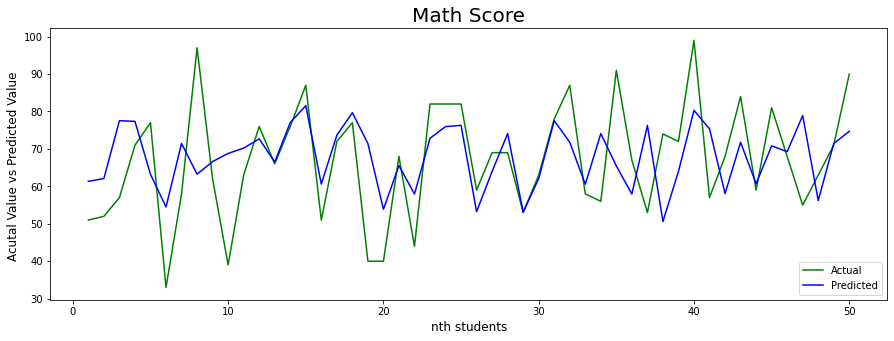

In [48]:
no_of_rows_data_to_lot_matscore = np.arange(1,data_to_plot_mathscore['Acutal'].count()+1);
plt.figure(figsize=(15,5))
plt.plot(no_of_rows_data_to_lot_matscore,data_to_plot_mathscore['Acutal'],'-g');
plt.plot(no_of_rows_data_to_lot_matscore,data_to_plot_mathscore['Predicted'],'-b');
plt.title('Math Score',size=20)
plt.xlabel('nth students',size = 12)
plt.ylabel('Acutal Value vs Predicted Value ',size = 12)
plt.legend(['Actual','Predicted'],loc=4)
#plt.plot(no_of_rows_data_to_lot_matscore,model_math_score.coef_[1]*no_of_rows_data_to_lot_matscore + model_math_score.intercept_);

plt.show()

In [49]:
data_to_plot_reading_score.head(20)

,Actual,Predicted
388,64,73.930061
154,67,64.730277
607,58,64.784938
938,81,72.959266
258,75,69.328519
575,55,63.733816
358,62,58.531814
774,65,62.066399
508,78,64.367170
5,83,71.912070


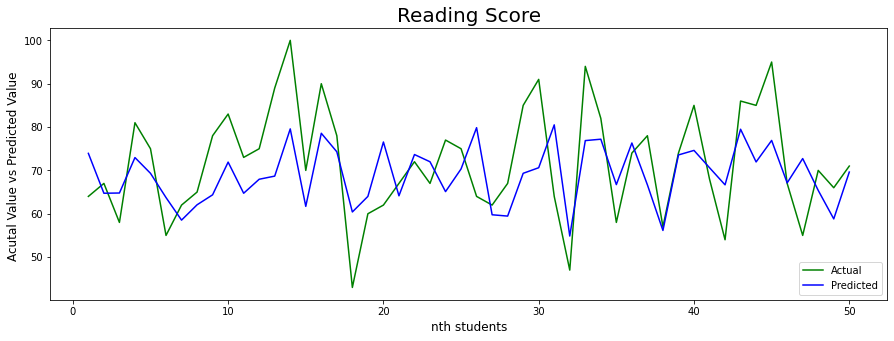

In [50]:
no_of_rows_data_to_lot_readingscore = np.arange(1,data_to_plot_reading_score['Actual'].count()+1);
plt.figure(figsize=(15,5))
plt.plot(no_of_rows_data_to_lot_readingscore,data_to_plot_reading_score['Actual'],'-g');
plt.plot(no_of_rows_data_to_lot_readingscore,data_to_plot_reading_score['Predicted'],'-b');

plt.title('Reading Score',size=20)
plt.xlabel('nth students',size = 12)
plt.ylabel('Acutal Value vs Predicted Value ',size = 12)
plt.legend(['Actual','Predicted'],loc=4)
plt.show()

In [51]:
data_to_plot_writing_score.head(20)


,Actual,Predicted
607,54,63.189947
42,65,71.374239
399,54,62.710377
496,52,70.693792
169,70,72.665854
187,68,72.809813
356,61,60.387010
560,79,82.606900
665,60,72.042325
635,64,59.139952


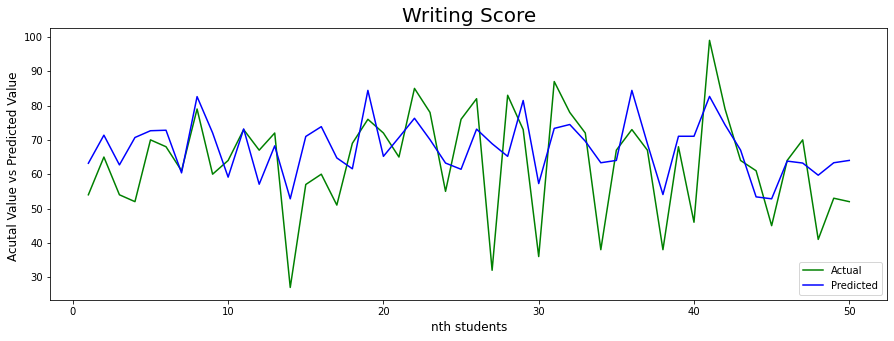

In [52]:
no_of_rows_data_to_lot_writingScore = np.arange(1,data_to_plot_writing_score['Actual'].count()+1);
plt.figure(figsize=(15,5))
plt.plot(no_of_rows_data_to_lot_writingScore,data_to_plot_writing_score['Actual'],'-g');
plt.plot(no_of_rows_data_to_lot_writingScore,data_to_plot_writing_score['Predicted'],'-b');

plt.title('Writing Score',size=20)
plt.xlabel('nth students',size = 12)
plt.ylabel('Acutal Value vs Predicted Value ',size = 12)
plt.legend(['Actual','Predicted'],loc=4)
plt.show()

In [53]:
model_math_score.score(x_test_1,y_test_1)

0.15465663599382795

In [54]:
model_reading_score.score(x_test_2,y_test_2)

0.28386746979592725

In [55]:
model_writing_score.score(x_test_3,y_test_3)

0.29436228153261446

In [56]:
# Root mean square value for math score
import math
from sklearn.metrics import con as mse
rmse = math.sqrt(mse(data_to_plot_mathscore['Acutal'],y_predict_math_score))
rmse

13.943063638168944

In [57]:
# Root mean square value for reading score
import math
from sklearn.metrics import mean_squared_error as mse
rmse = math.sqrt(mse(data_to_plot_reading_score['Actual'],y_predict_readin_score))
rmse

10.567239253216568

In [58]:
# Root mean square value for writing score
import math
from sklearn.metrics import mean_squared_error as mse
rmse = math.sqrt(mse(data_to_plot_writing_score['Actual'],y_predict_writing_score))
rmse

12.625132234111897